## Distance From Home and Employee Attrition: A Bias and Ethics Analysis


                                        - Mounika Varma (M01656552)

### Import libraries & load data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/surpa/Downloads/HR_Employee_Attrition.csv')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Check the key columns

In [ ]:
df[['DistanceFromHome', 'Attrition']].info()


In [6]:
df['Attrition'].value_counts()


Attrition
No     1233
Yes     237
Name: count, dtype: int64

This gives an overall attrition rate of about 16 percent which is a fair place to draw a comparison of attrition of the various commuting distance groups.

### Basic distribution of DistanceFromHome

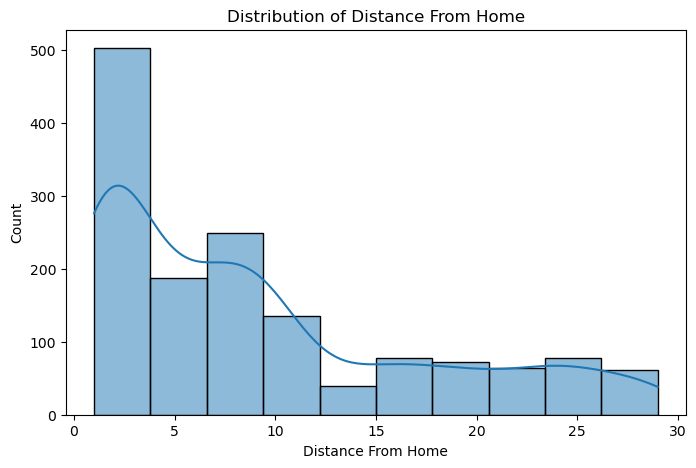

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['DistanceFromHome'], bins=10, kde=True)
plt.title('Distribution of Distance From Home')
plt.xlabel('Distance From Home')
plt.ylabel('Count')
plt.show()


Distance From Home distribution demonstrates that the upper percentage of employees have a relatively close distance to workplace, and the most significant concentration is between 1 and 10 units of distance. Beyond this distance, the number of employees is decreasing gradually. This skewed right data indicates that high commuting distances are low but nonetheless a significant group of the workforce.
#### Interpretation:
Majority of employees now reside nearer to the workplace, although a non-negligible proportion of employees have to travel further so the commute could bring new time, financial, and physical costs.

### Compare DistanceFromHome by Attrition

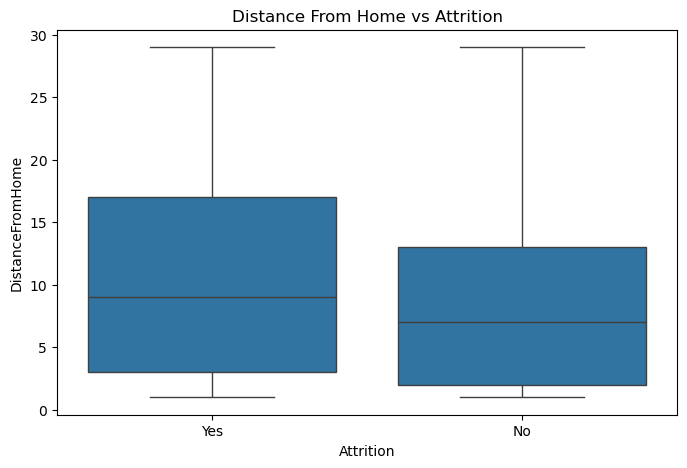

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Attrition', y='DistanceFromHome')
plt.title('Distance From Home vs Attrition')
plt.show()


The boxplot indicates a significant difference in commuting distance among those employees that left and those that remained within the organization. On average, employees who showed attrition ("Yes") tend to be further away home than the employees who stayed ("No"). Also, the spreading of distances of the employees who left is broader, which means that variability of commuting distance among those who experienced attrition is a lot bigger

### Create distance groups

In [9]:
# Create distance categories
df['DistanceGroup'] = pd.cut(
    df['DistanceFromHome'],
    bins=[0, 5, 10, 20, 30],
    labels=['Very Close', 'Close', 'Moderate', 'Far']
)

pd.crosstab(df['DistanceGroup'], df['Attrition'], normalize='index') * 100


Attrition,No,Yes
DistanceGroup,,
Very Close,86.234177,13.765823
Close,85.532995,14.467005
Moderate,80.000000,20.000000
Far,77.941176,22.058824


The table indicates that the percentage of attrition grows evidently with the commuting distance. The lowest rate of attrition is on employees who live Very Close to their place of work (13.77%), and the highest rate is among those in the Far distance group (22.06%).

### Visualize attrition percentage by distance group

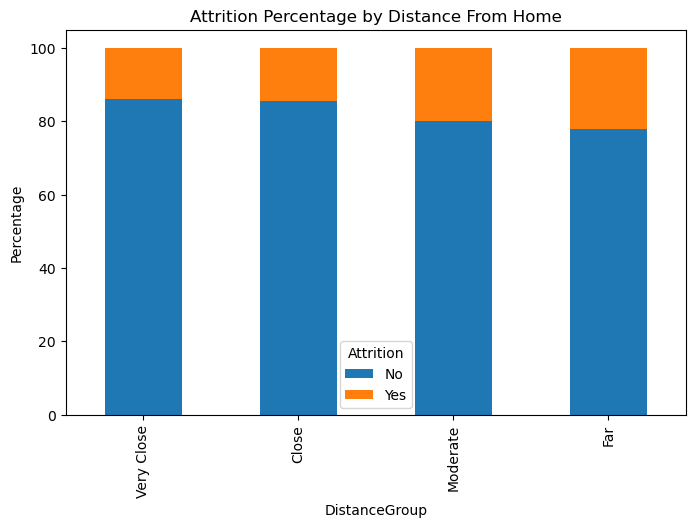

In [10]:
distance_attrition = pd.crosstab(df['DistanceGroup'], df['Attrition'], normalize='index') * 100

distance_attrition.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Attrition Percentage by Distance From Home')
plt.ylabel('Percentage')
plt.show()


The visualization that can be interpreted as this stacked bar chart demonstrates a noticeable rising tendency in terms of the attrition with the commuting distance. Workers in the moderate and far distance categories record significantly more attrition than those residing in closer proximity to the place of work, which further supports the correlation of commuting burden with retention of employees.

### Final Summary
This discussion has used the HR Employee Attrition data to analyze the relationship between commuting distance and employee attrition. Explo data analysis showed that although the majority of the employees reside relatively near the workplace, the number of those with longer commuting distance is relatively smaller but significant.

The findings indicate that there is an evident and steady rise in the rate of attrition with the distance away at home. The lowest attrition rate was observed among employees who live very near to the workplace (13.77%), and the highest aspect of attrition rate is observed among those in far distance category (22.06%). The visualization using boxplot and percentages also supported the fact that the median commuting distance of employees who left the organization is likely to be higher than that of employees who have remained in the organization.

Ethically, these results indicate that the distance of commuting can be used as an indicator of hidden socioeconomic limitations, including financial constraints on housing, access to transportation, and time resource. Though the distance to home is not a demographic variable, its mediating effect could lead to disproportional employee retention. On balance, the current analysis shows that it is necessary to take into consideration not only the aspects that are not too obvious but also structural aspects when assessing workplace fairness and formulating equity organizational policies.